In [ ]:
import pathlib
import yaml
import numpy as np

collection = pathlib.Path("../collections/armor_plates_9-14-25")
examples = collection / "examples"

assert examples.exists()

../collections/armor_plates_9-14-25/examples/pipeline-meta-b20250927_032817.json


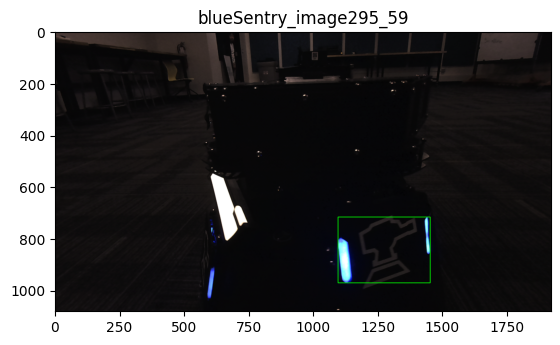

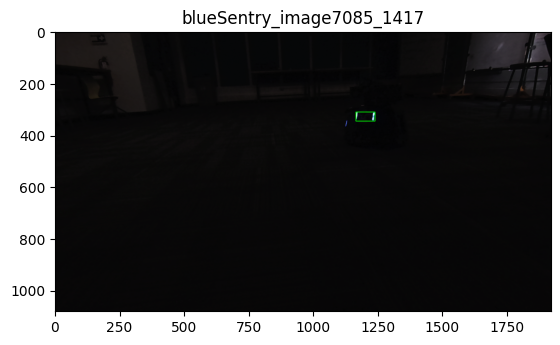

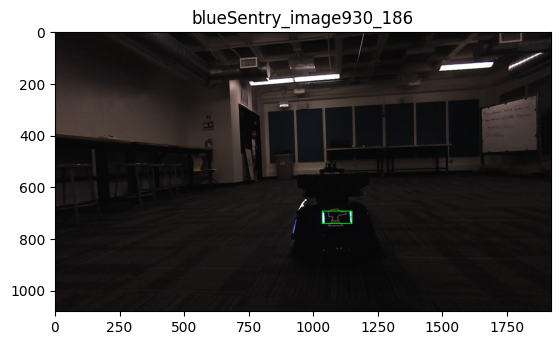

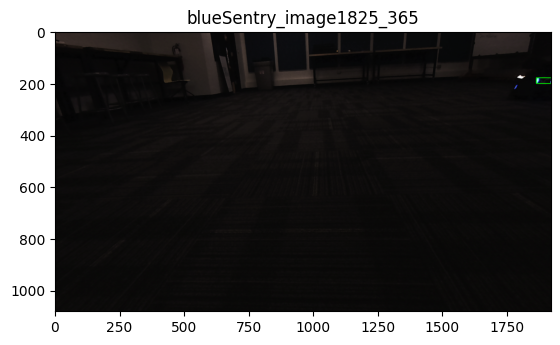

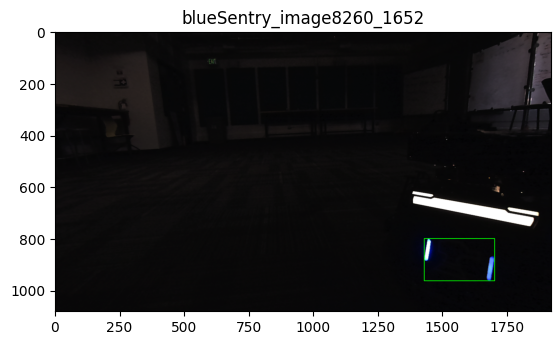

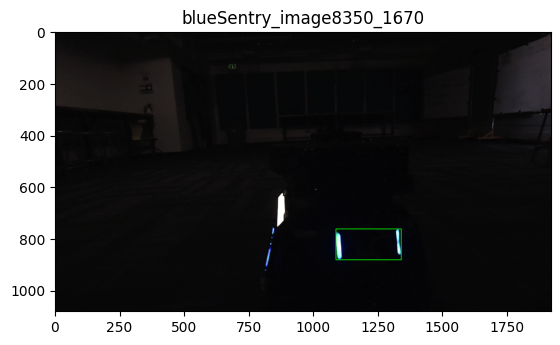

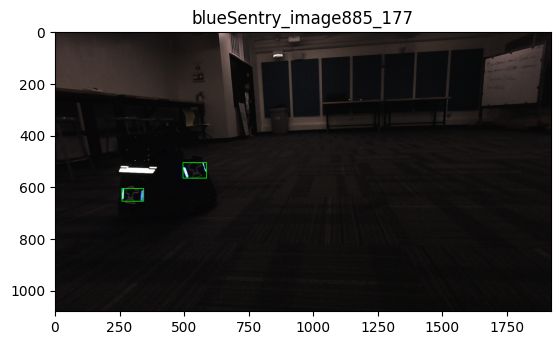

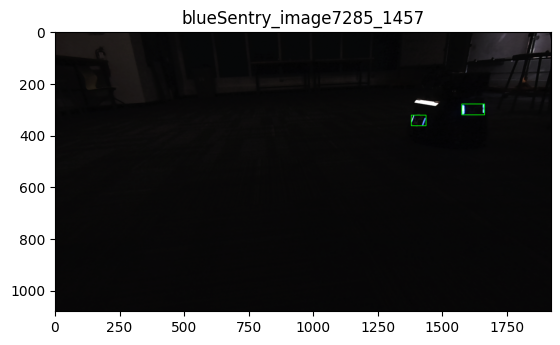

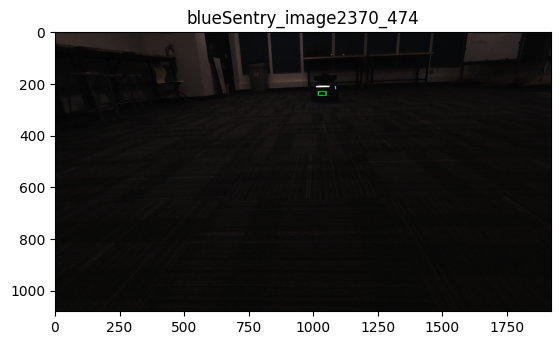

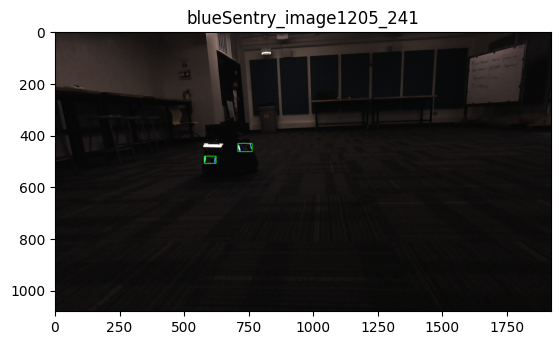

In [26]:
import json
import cv2
import matplotlib.pyplot as plt

# change to look at different set
meta = next(examples.glob("pipeline-meta-*.json"))
print(meta)
meta = meta.read_text()
meta = json.loads(meta)

images = examples / "undistorted"
assert images.exists()

plate_data = {}
for entry in meta["examples"]:
    valid = entry["valid"]
    name = entry["name"]

    if valid:
        plates = entry["labels"]["plates"]
        plate_data[name] = plates

num_samples = 15
sample_count = 0
for path in images.iterdir():
    if path.name in plate_data:
        image = cv2.imread(path)

        plates = plate_data[path.name]
        for x, y, w, h in plates:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb)
        plt.title(path.stem)
        plt.show()

    sample_count += 1
    if sample_count >= num_samples:
        break